<a href="https://colab.research.google.com/github/Abhi-nav0506/Capstone-Project---Bike-Sharing-Demand-Prediction--/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from plotnine import ggplot
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [152]:
seoul_bike_data = pd.read_csv('/content/drive/MyDrive/Copy of SeoulBikeData.csv', encoding= 'unicode_escape')

In [ ]:
seoul_bike_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
seoul_bike_data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
seoul_bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
seoul_bike_data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [154]:
seoul_bike_data1 = seoul_bike_data.copy()

In [155]:
# feature extraction:

seoul_bike_data1["Date_Hour"] = pd.to_datetime(pd.to_datetime(seoul_bike_data1.Date).dt.strftime('%d/%m/%Y')) #strftime converts date to string, so pd.to_datetime is applied again.

seoul_bike_data1['Date_Hour'] +=  pd.to_timedelta(seoul_bike_data1.Hour, unit='h') # adding hour detail to datetime as per hour given in 'hour' column, using pd.to_timedelta

seoul_bike_data1.set_index('Date_Hour',inplace = True) #setting datetime as index

#extracting various units of time
seoul_bike_data1['Year'] = seoul_bike_data1.index.year
seoul_bike_data1['Month'] = seoul_bike_data1.index.month
seoul_bike_data1['Weekday'] = seoul_bike_data1.index.weekday
seoul_bike_data1['Week'] = seoul_bike_data1.index.week

In [ ]:
pd.set_option('display.max_rows', None)

seoul_bike_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Weekday,Week
Date_Hour,,,,,,,,,,,,,,,,,,
2017-12-01 00:00:00,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,48
2017-12-01 01:00:00,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,48
2017-12-01 02:00:00,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,48
2017-12-01 03:00:00,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,48
2017-12-01 04:00:00,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,48


In [156]:
# rented bike count == 0:

seoul_bike_data1[seoul_bike_data1['Rented Bike Count'] == 0]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Weekday,Week
Date_Hour,,,,,,,,,,,,,,,,,,
2018-04-11 00:00:00,11/04/2018,0,0,14.4,82,4.6,1041,11.3,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,2,15
2018-04-11 01:00:00,11/04/2018,0,1,13.6,81,3.6,886,10.3,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,2,15
2018-04-11 02:00:00,11/04/2018,0,2,12.7,80,3.9,885,9.3,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,2,15
2018-04-11 03:00:00,11/04/2018,0,3,11.6,81,3.1,687,8.4,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,2,15
2018-04-11 04:00:00,11/04/2018,0,4,10.2,83,3.5,554,7.4,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-09 19:00:00,09/11/2018,0,19,11.9,71,2.7,589,6.7,0.0,0.0,0.0,Autumn,No Holiday,No,2018,11,4,45
2018-11-09 20:00:00,09/11/2018,0,20,11.9,72,2.5,526,7.0,0.0,0.0,0.0,Autumn,No Holiday,No,2018,11,4,45
2018-11-09 21:00:00,09/11/2018,0,21,11.4,74,1.9,498,6.9,0.0,0.0,0.0,Autumn,No Holiday,No,2018,11,4,45


In [157]:
seoul_bike_data1['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [158]:
# functioning day & rented bike count == 0
seoul_bike_data1[seoul_bike_data1['Rented Bike Count'] == 0]['Functioning Day'].unique()

array(['No'], dtype=object)

In [159]:
# functioning day & rented bike count != 0
seoul_bike_data1[seoul_bike_data1['Rented Bike Count'] != 0]['Functioning Day'].unique()

array(['Yes'], dtype=object)

#### Rented Bike Count is zero for the days when the service provider was not functioning. Removing these records for Linear Regression will be beneficial.

In [160]:
seoul_bike_data1 = seoul_bike_data1.drop(seoul_bike_data1[ ( seoul_bike_data1['Functioning Day'] == 'No') ].index)
seoul_bike_data1.shape

(8465, 18)

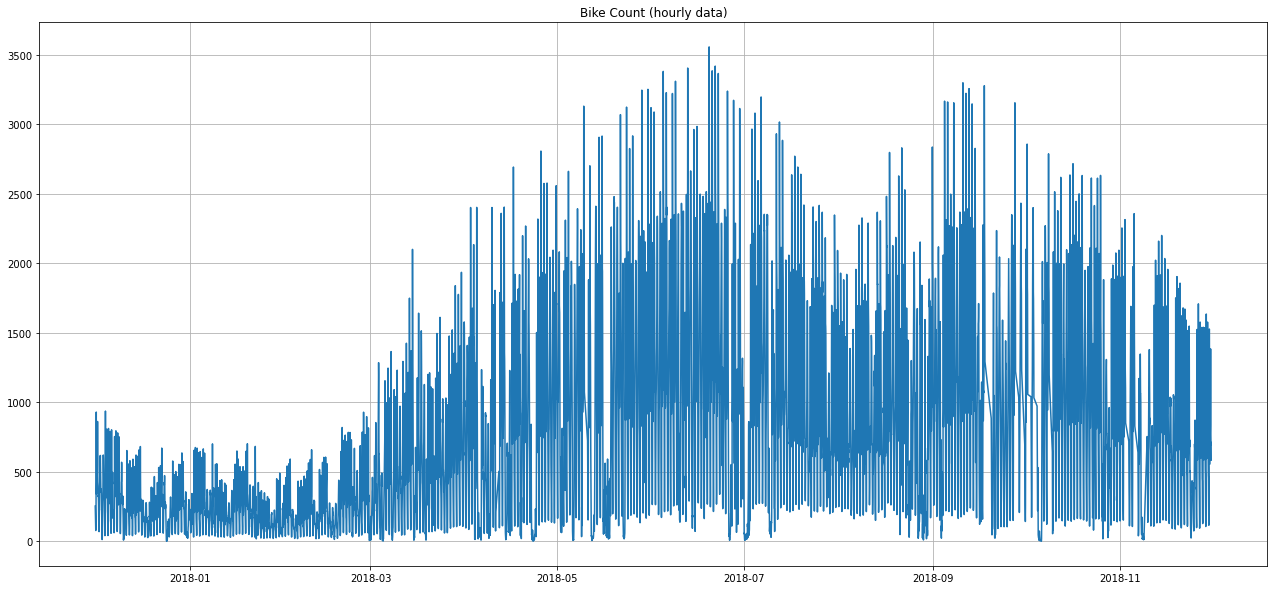

In [161]:
plt.figure(figsize=(22, 10))
plt.plot(seoul_bike_data1['Rented Bike Count'])
plt.title('Bike Count (hourly data)')
plt.grid(True)
plt.show()

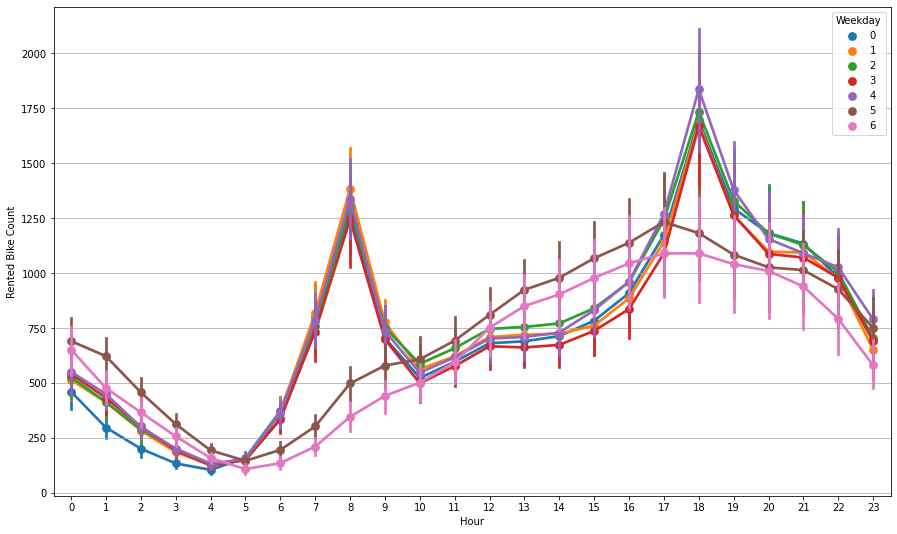

In [162]:
plt.figure(figsize=(15, 9))
plt.grid(True)
sns.pointplot(x= seoul_bike_data1['Hour'], y=seoul_bike_data1['Rented Bike Count'], hue = seoul_bike_data1['Weekday'])

plt.show()
plt.close()

#### Normal weekdays, i.e. Monday to Friday (0 to 4) behave in a similar pattern through the 24 hours of the day, whereas the weekends, i.e. Saturday & Sunday (5 & 6) behave similary.
#### Hence, demand on normal weekdays is different from that on weekends.

In [ ]:
# adding is_weekend 0/1  catagorical variable

seoul_bike_data['is_weekend'] = seoul_bike_data['Weekday'].apply(lambda x : 1 if x in [5,6] else 0)

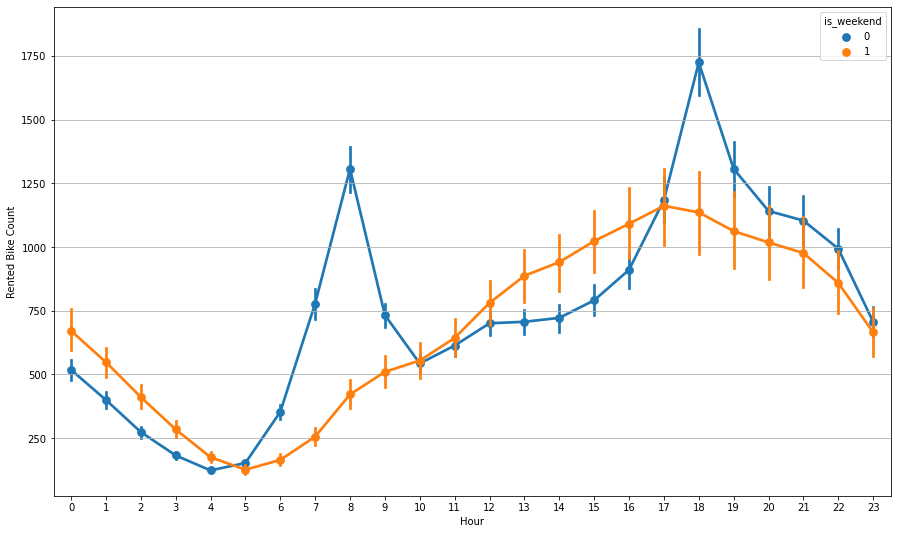

In [ ]:
plt.figure(figsize=(15, 9))
plt.grid(True)
sns.pointplot(x= seoul_bike_data['Hour'], y=seoul_bike_data['Rented Bike Count'], hue = seoul_bike_data['is_weekend'])

plt.show()
plt.close()

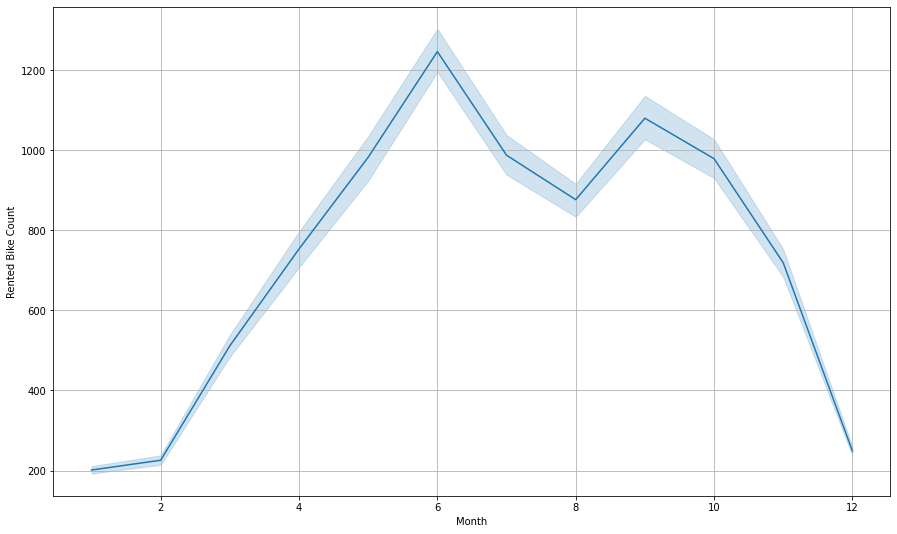

In [ ]:
plt.figure(figsize=(15, 9))
plt.grid(True)
sns.lineplot(x= seoul_bike_data['Month'], y=seoul_bike_data['Rented Bike Count'])

plt.show()
plt.close()

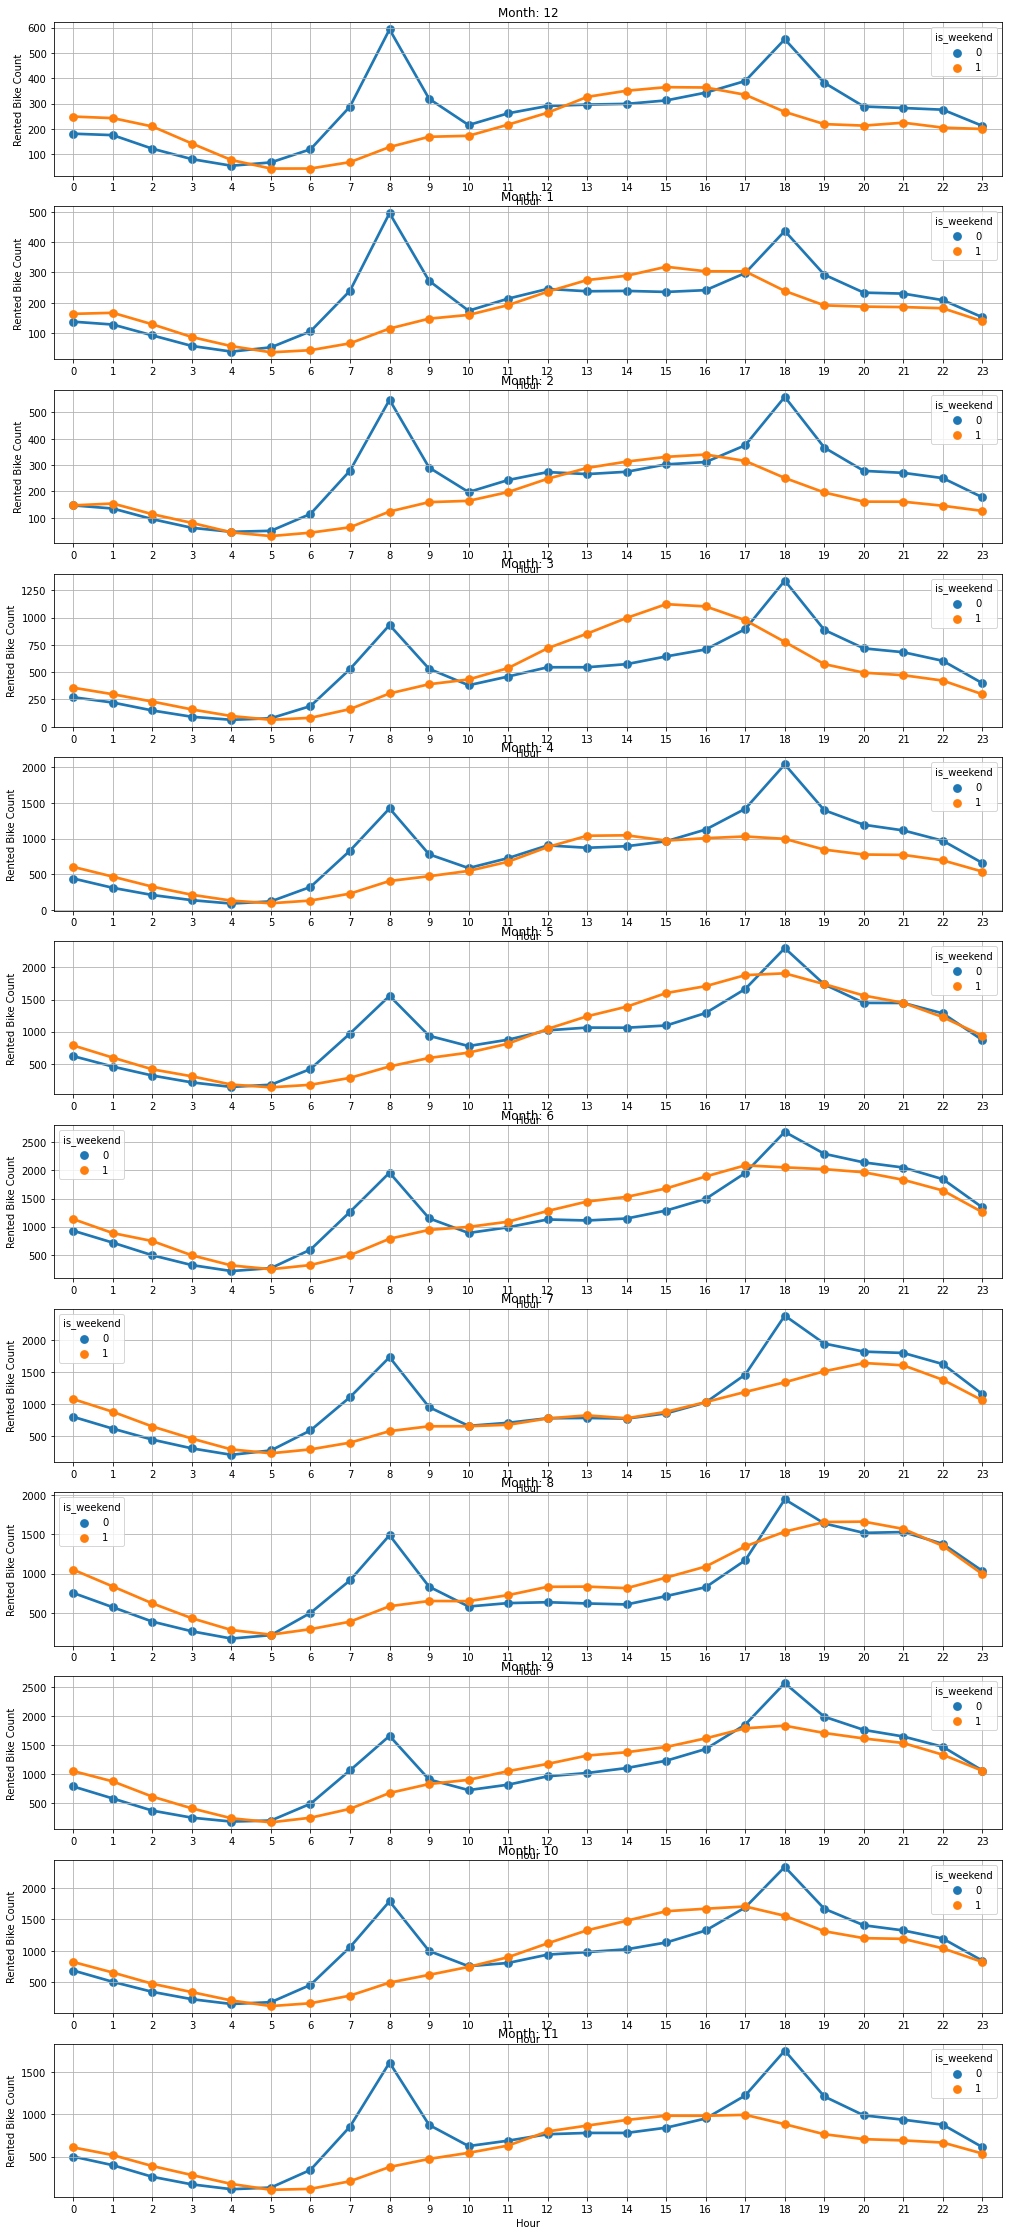

In [ ]:
seasonal_df = pd.DataFrame(seoul_bike_data.groupby(['Month','is_weekend','Hour'])['Rented Bike Count'].mean()).reset_index()

weekdays = [0,1,2,3,4,5,6]

#seasons = ['Winter','Spring','Summer','Autumn']
months = [12,1,2,3,4,5,6,7,8,9,10,11] 

fig, ax = plt.subplots(12, 1, figsize=(17,40))

a = 0

for month in months:
  season_df = seasonal_df[seasonal_df['Month'] == month]
  sns.pointplot(x= season_df['Hour'], y=season_df['Rented Bike Count'], hue = season_df['is_weekend'], ax = ax[a])
  ax[a].grid()
  season_name = 'Month: ' + str(month)
  ax[a].set_title(season_name)
  a += 1


In [ ]:
seoul_bike_data[(seoul_bike_data['Holiday']== 'Holiday') & (seoul_bike_data['is_weekend']== 0)]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Weekday,Week,is_weekend
Date_Hour,,,,,,,,,,,,,,,,,,,
2017-12-22 00:00:00,22/12/2017,196,0,-1.7,79,0.5,794,-4.8,0.0,0.0,0.8,Winter,Holiday,Yes,2017,12,4,51,0
2017-12-22 01:00:00,22/12/2017,250,1,-1.6,79,0.6,784,-4.7,0.0,0.0,0.8,Winter,Holiday,Yes,2017,12,4,51,0
2017-12-22 02:00:00,22/12/2017,161,2,-1.1,79,0.7,736,-4.2,0.0,0.0,0.8,Winter,Holiday,Yes,2017,12,4,51,0
2017-12-22 03:00:00,22/12/2017,99,3,-0.6,76,0.5,789,-4.3,0.0,0.0,0.7,Winter,Holiday,Yes,2017,12,4,51,0
2017-12-22 04:00:00,22/12/2017,64,4,-0.3,76,0.9,760,-4.0,0.0,0.0,0.7,Winter,Holiday,Yes,2017,12,4,51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-03 19:00:00,03/10/2018,1792,19,20.0,49,1.5,2000,8.9,0.0,0.0,0.0,Autumn,Holiday,Yes,2018,10,2,40,0
2018-10-03 20:00:00,03/10/2018,1744,20,18.6,55,1.5,2000,9.3,0.0,0.0,0.0,Autumn,Holiday,Yes,2018,10,2,40,0
2018-10-03 21:00:00,03/10/2018,1594,21,17.6,59,1.6,2000,9.4,0.0,0.0,0.0,Autumn,Holiday,Yes,2018,10,2,40,0


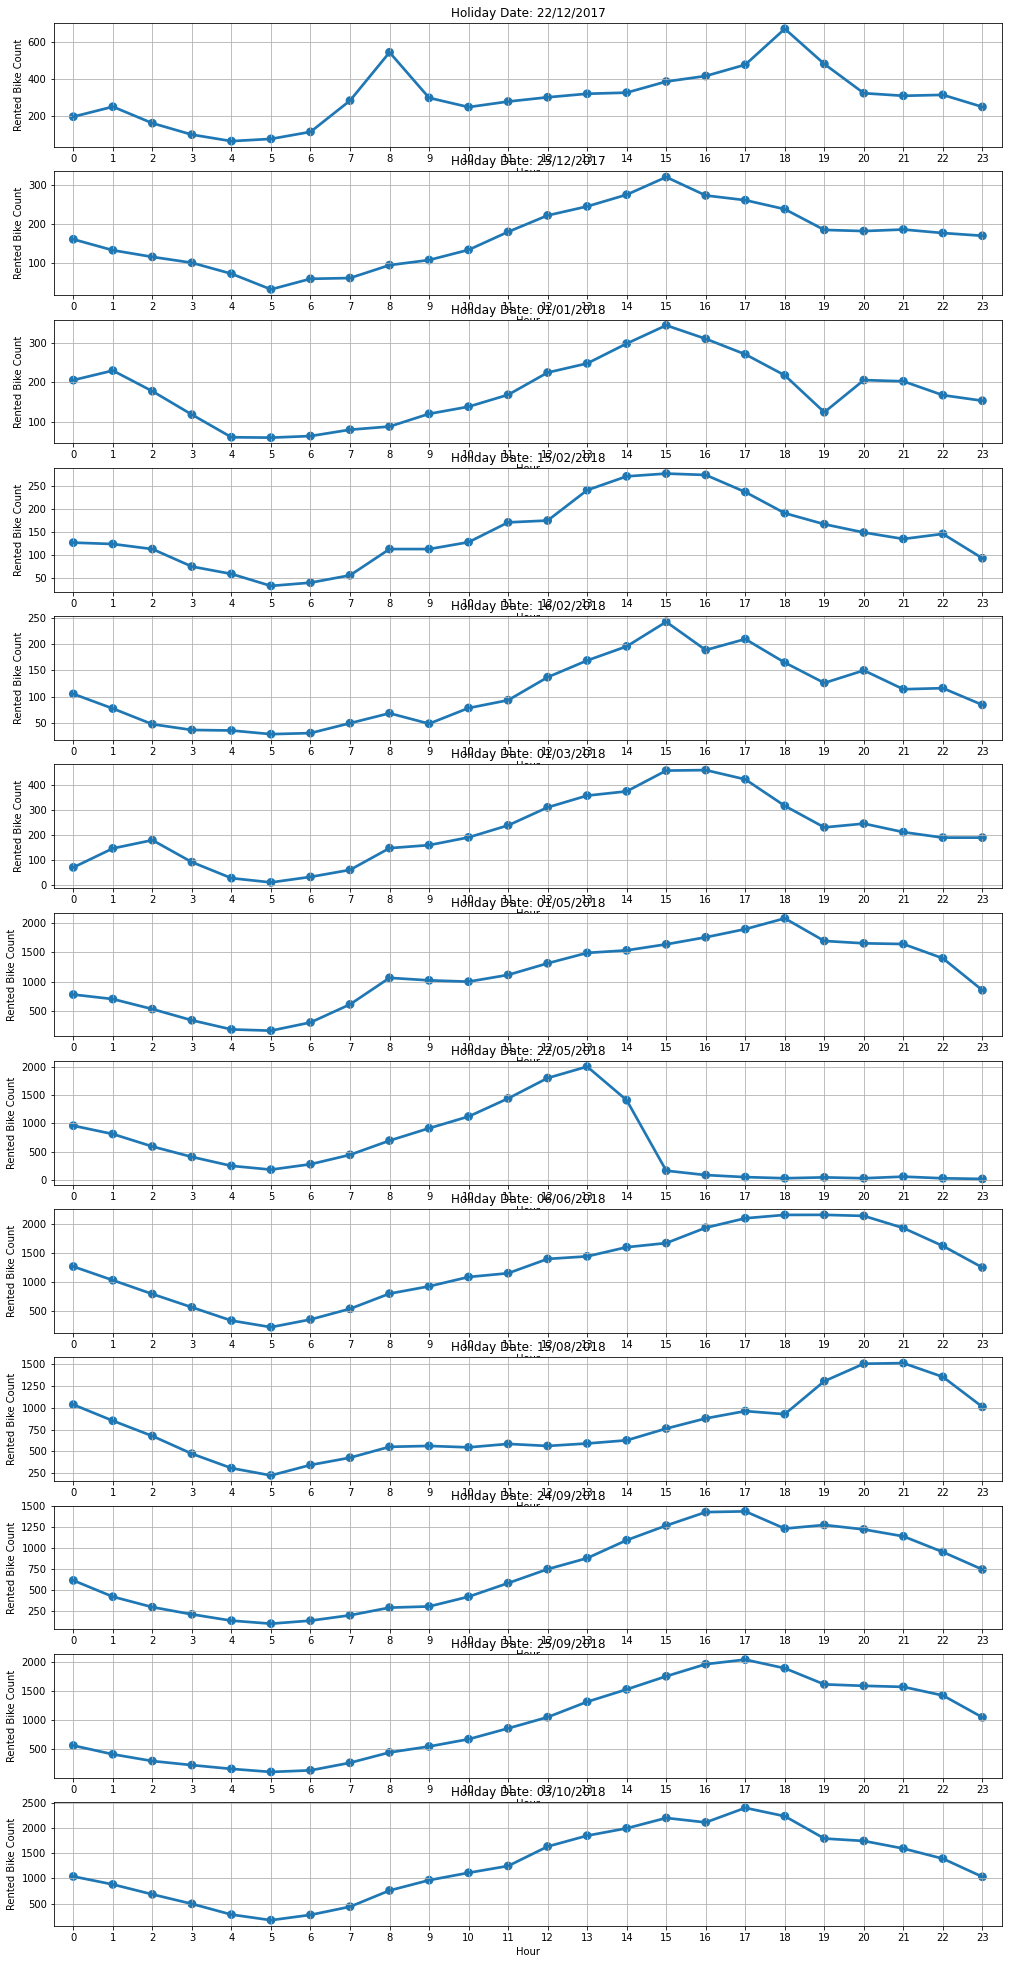

In [ ]:
holidates = list(seoul_bike_data[(seoul_bike_data['Holiday']== 'Holiday') & (seoul_bike_data['is_weekend']== 0)].Date.unique())

fig, ax = plt.subplots(len(holidates), 1, figsize=(17,35))

a = 0

for date in holidates:
  holidate_df = seoul_bike_data[seoul_bike_data['Date'] == date]
  sns.pointplot(x= holidate_df['Hour'], y=holidate_df['Rented Bike Count'],  ax = ax[a])
  ax[a].grid()
  season_name = 'Holiday Date: ' + str(date)
  ax[a].set_title(season_name)
  a += 1

#### Holiday date doesn't seems to be 22/12/2017 doesn't seem to be a holiday as there are spikes around 8 am and 6 pm like the regular weekdays. This needs to be categorised as 'no holiday'.

#### The remaining non weekend holidays have the pattern similar to weekends of the respective months they fall into.

#### So, we should club these together with weekends like 'is_holiday_or_weekend', as a binary variable.

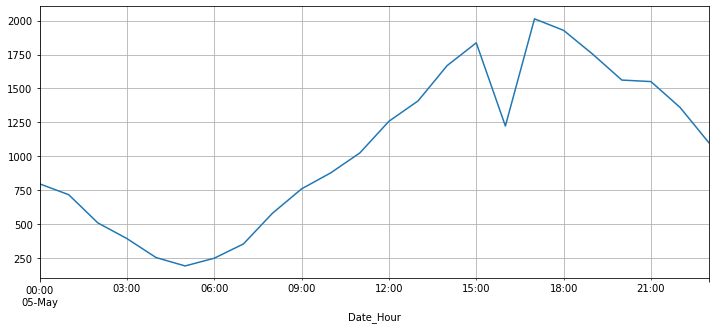

In [ ]:
plt.figure(figsize=(12, 5))
seoul_bike_data[seoul_bike_data['Date'] == '05/05/2018']['Rented Bike Count'].plot()
plt.grid(which='both')

In [ ]:
numeric_features = seoul_bike_data.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Year',
       'Month', 'Weekday', 'Week', 'is_weekend'],
      dtype='object')

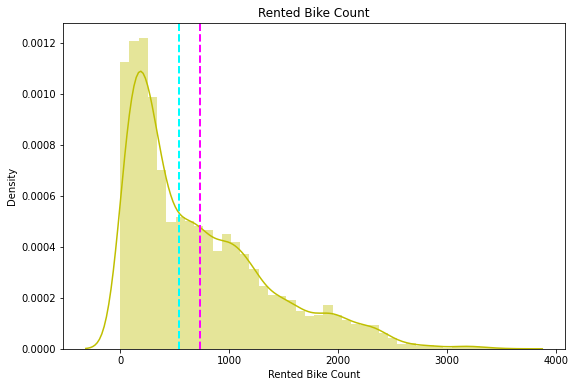

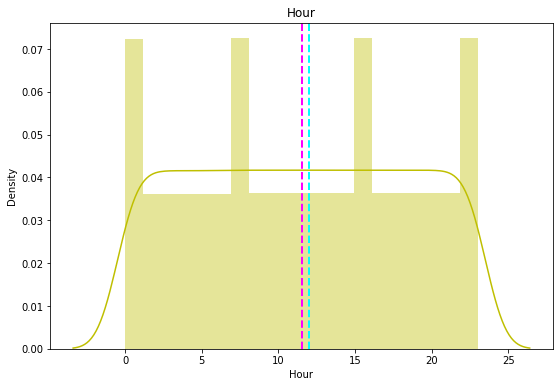

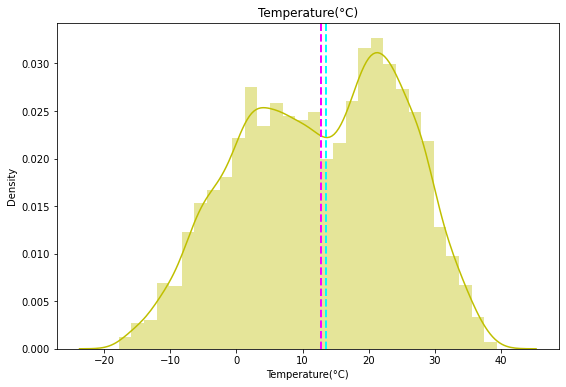

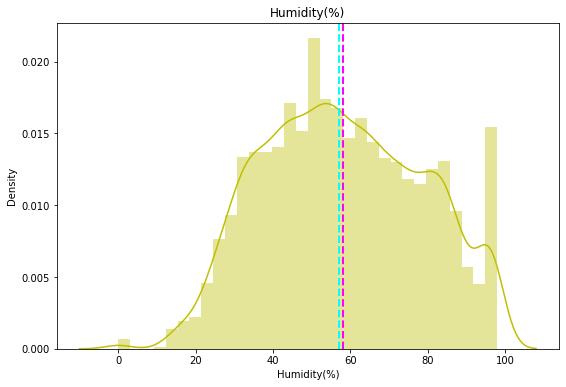

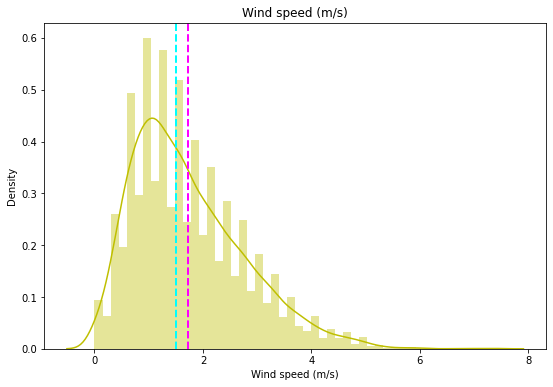

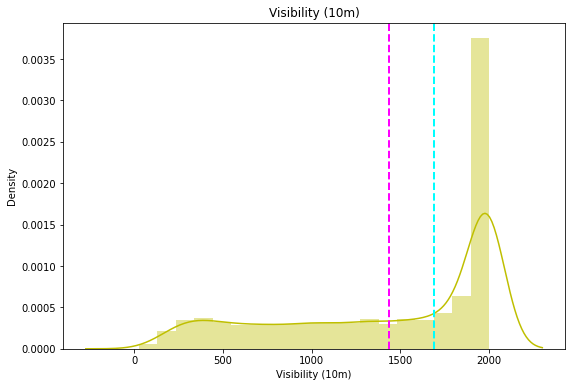

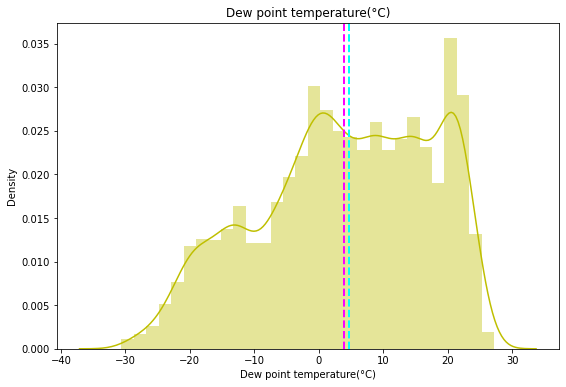

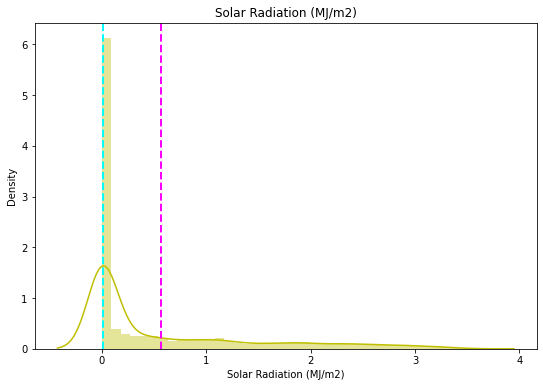

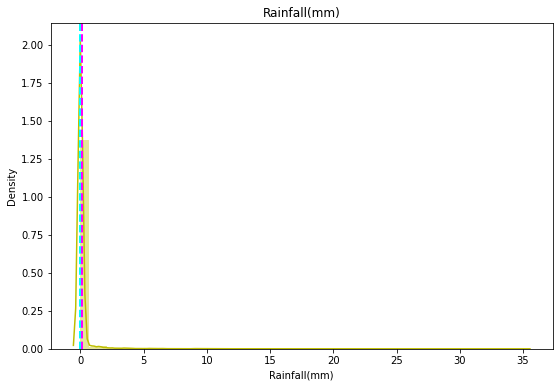

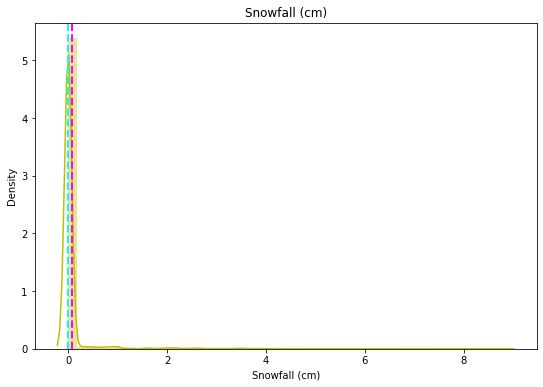

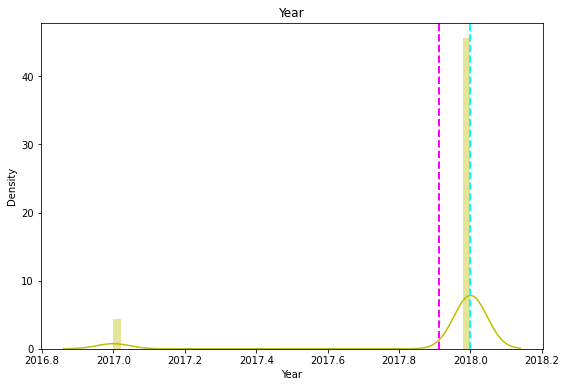

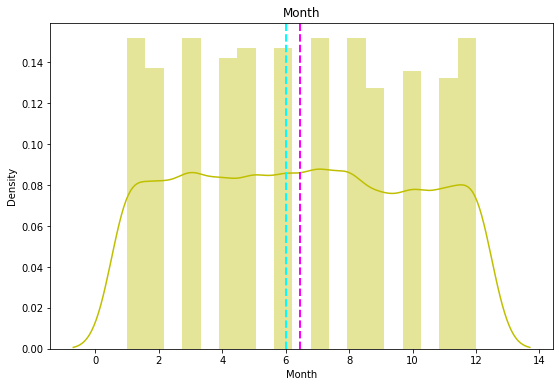

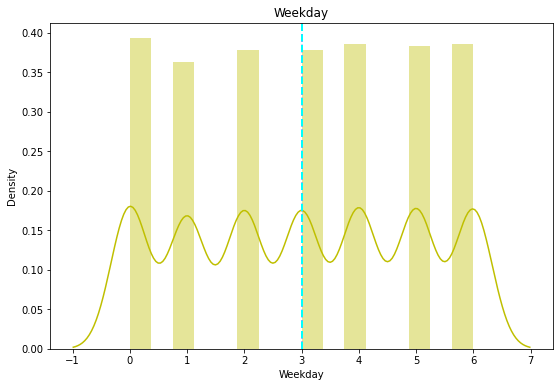

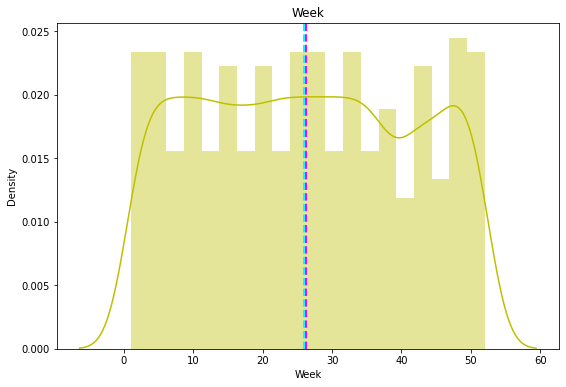

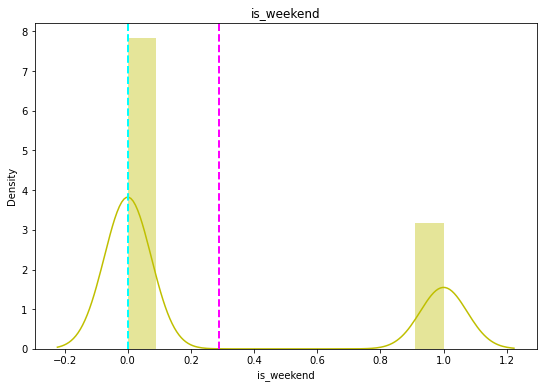

In [ ]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    #feature = seoul_bike_date[col]
    #feature.hist(bins=50, ax = ax)
    sns.distplot(seoul_bike_data[col],color="y")
    ax.axvline(seoul_bike_data[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(seoul_bike_data[col].median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

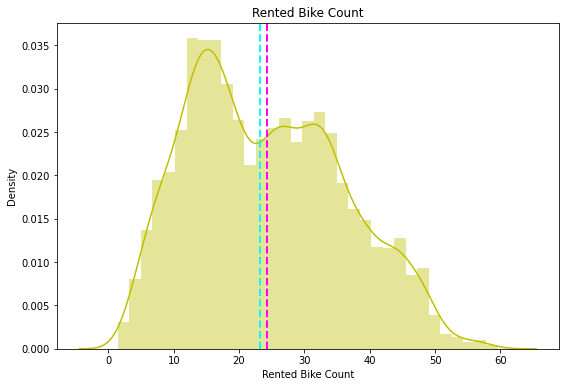

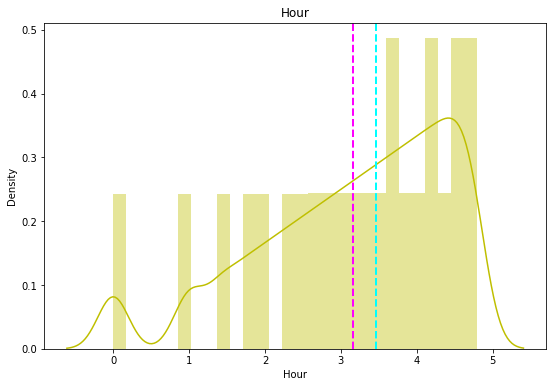

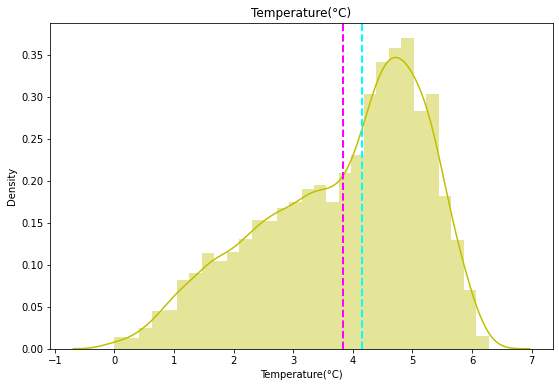

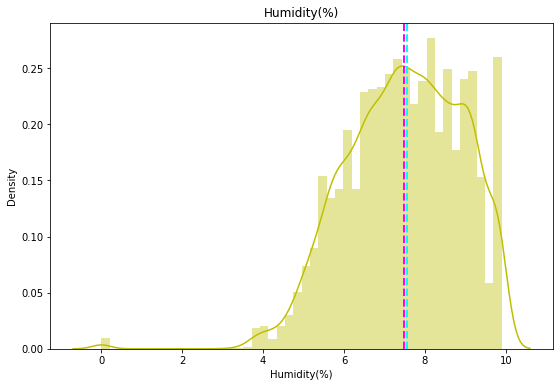

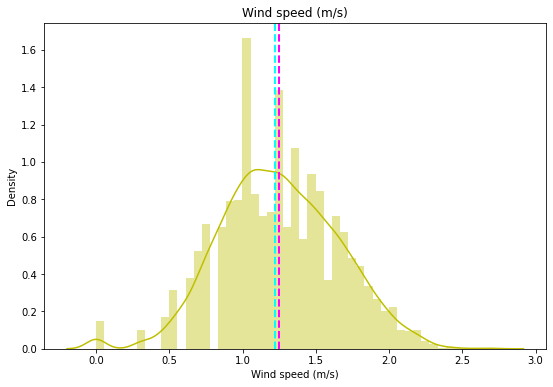

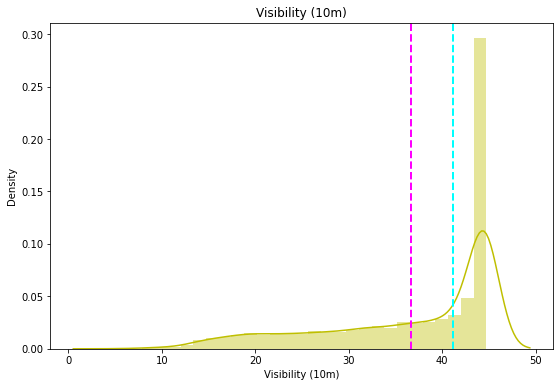

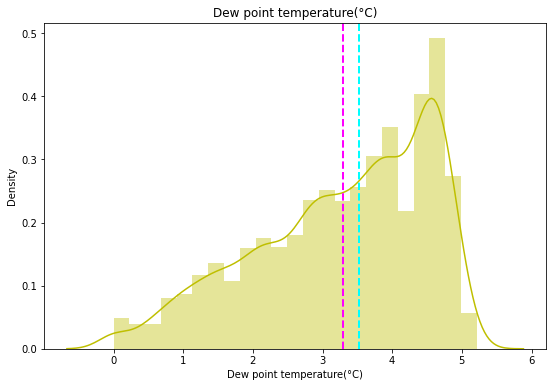

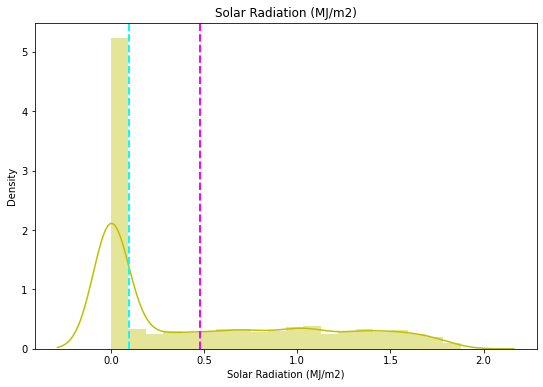

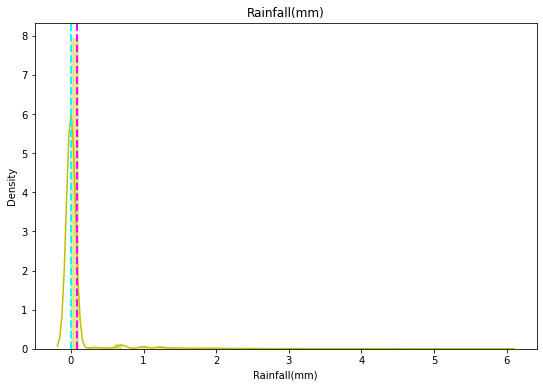

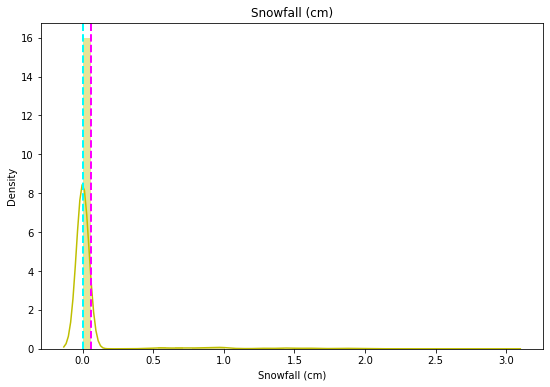

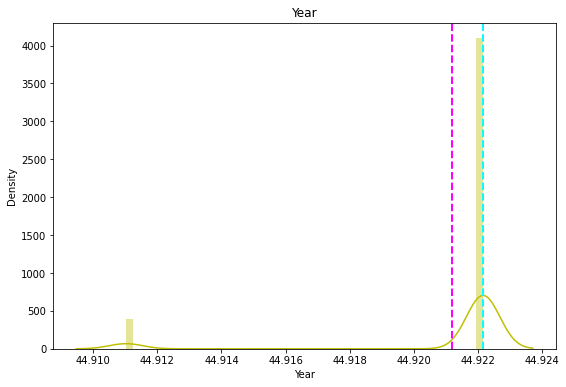

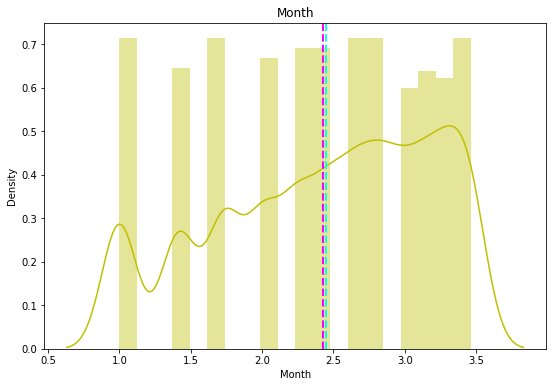

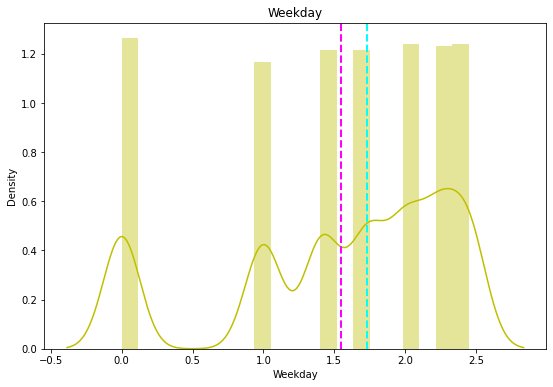

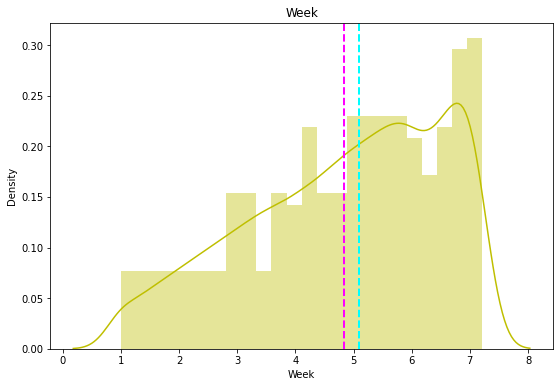

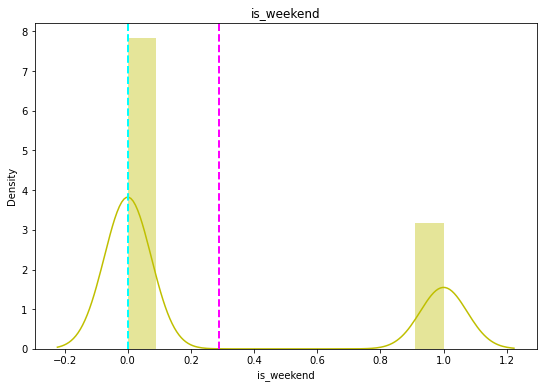

In [ ]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    #feature = seoul_bike_date[col]
    #feature.hist(bins=50, ax = ax)
    sns.distplot(np.sqrt(seoul_bike_data[col]),color="y")
    ax.axvline(np.sqrt(seoul_bike_data[col]).mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(np.sqrt(seoul_bike_data[col]).median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

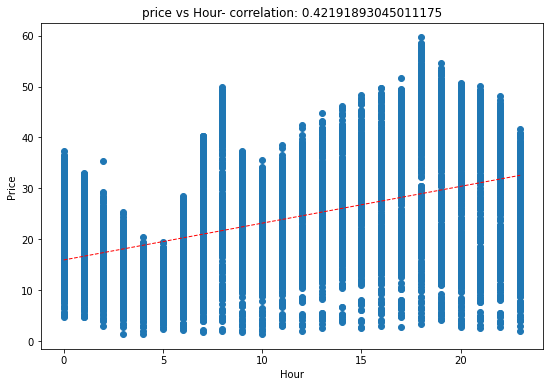

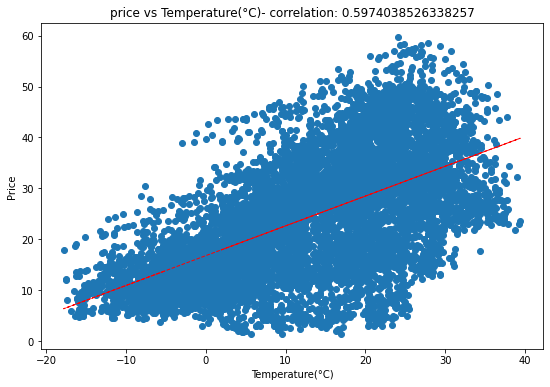

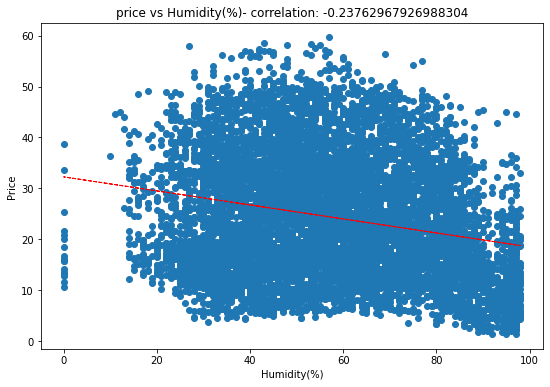

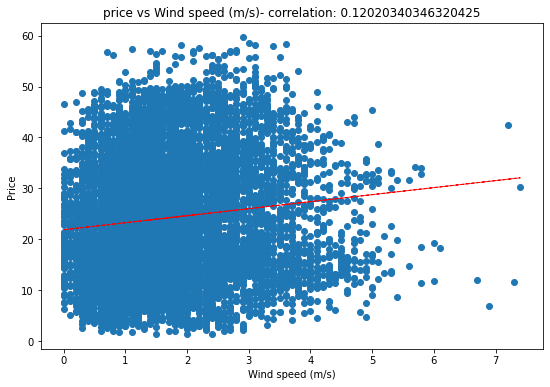

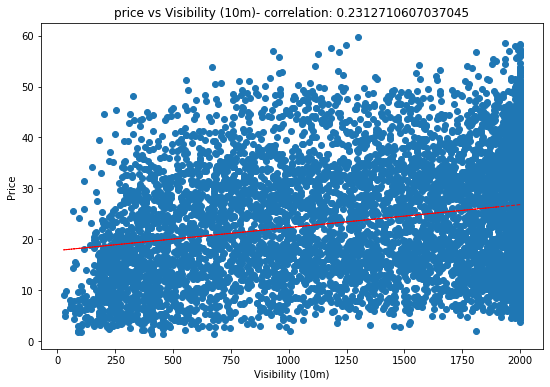

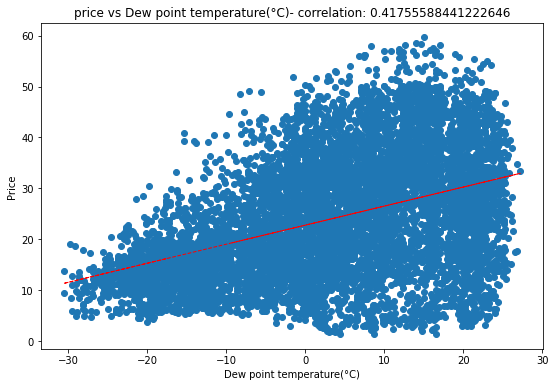

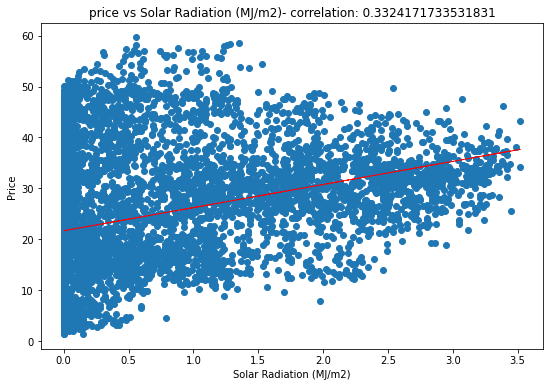

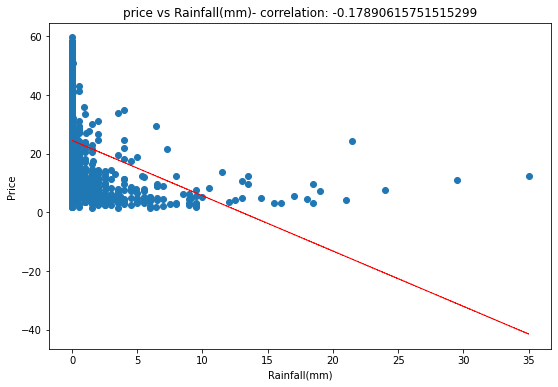

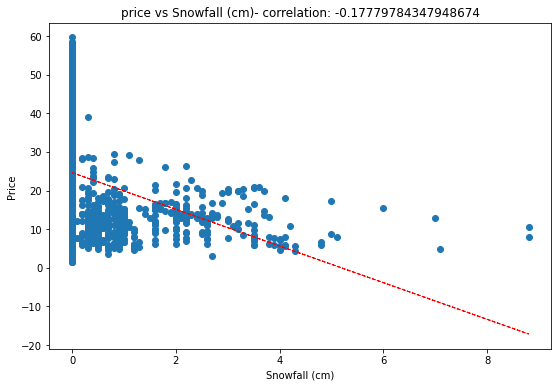

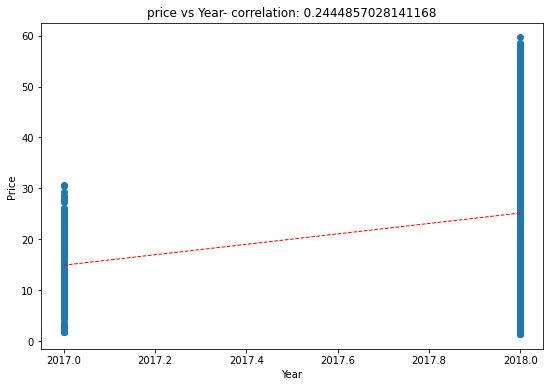

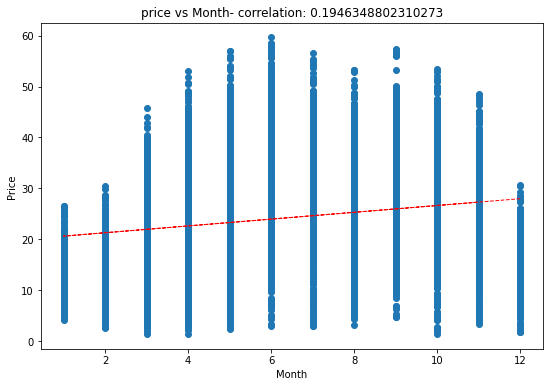

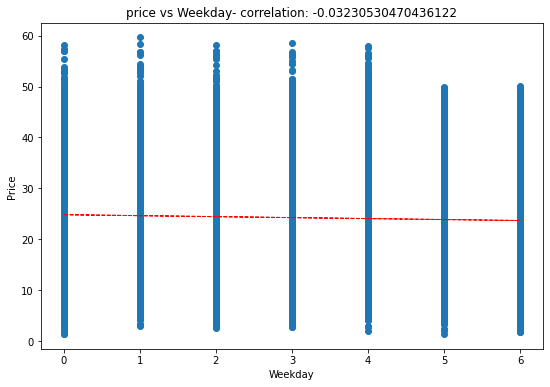

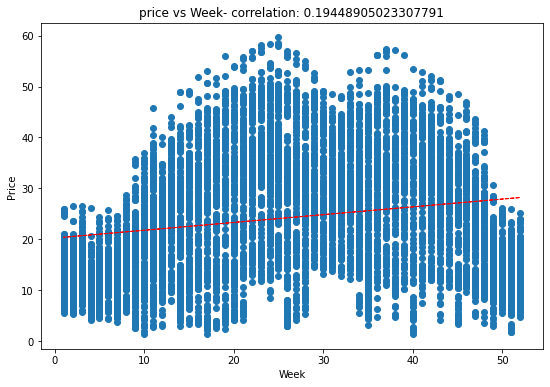

In [ ]:
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = seoul_bike_data[col]
    label = np.sqrt(seoul_bike_data['Rented Bike Count'])
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Price')
    ax.set_title('price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(seoul_bike_data[col], np.sqrt(seoul_bike_data['Rented Bike Count']), 1)
    y_hat = np.poly1d(z)(seoul_bike_data[col])

    plt.plot(seoul_bike_data[col], y_hat, "r--", lw=1)

plt.show()

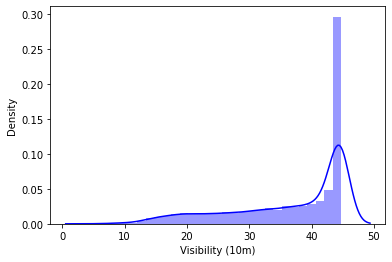

In [ ]:
sns.distplot(np.sqrt(seoul_bike_data['Visibility (10m)']) ,color='b')

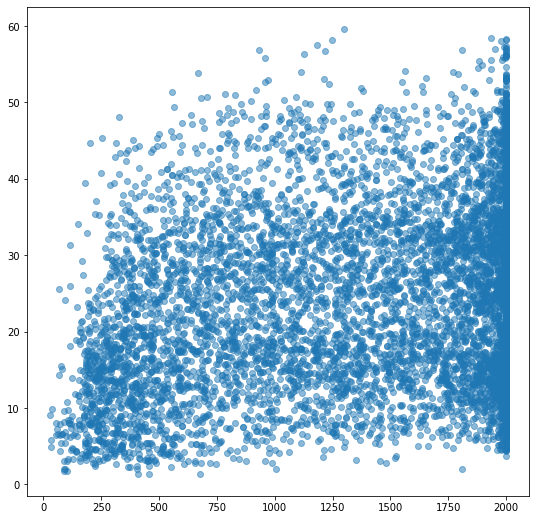

In [ ]:
plt.figure(figsize = (9,9))
plt.scatter((seoul_bike_data['Visibility (10m)']) , np.sqrt(seoul_bike_data['Rented Bike Count']) ,alpha = 0.5)

In [ ]:
seoul_bike_data['Solar Radiation (MJ/m2)'].isna().unique()

array([False])

In [ ]:
X = seoul_bike_data.copy()
Y = seoul_bike_data['Rented Bike Count'].copy()

In [ ]:
from sklearn.model_selection import train_test_split 
seoul_xtrain_ts, seoul_xtest_ts, seoul_ytrain_ts, seoul_ytest_ts = train_test_split( X,Y , test_size = 0.30,shuffle = True ,random_state = 3) 
print(seoul_xtrain_ts.shape)
print(seoul_xtest_ts.shape)
print(seoul_ytrain_ts.shape)
print(seoul_ytest_ts.shape)

(5925, 19)
(2540, 19)
(5925,)
(2540,)


In [ ]:
# train set
seoul_xtrain_ts['Rented Bike Count sqrt'] = np.sqrt(seoul_xtrain_ts['Rented Bike Count'])
seoul_xtrain_ts['Wind speed (m/s) sqrt'] = np.sqrt(seoul_xtrain_ts['Wind speed (m/s)'])
seoul_xtrain_ts['Rainfall(mm) sqrt'] = np.sqrt(seoul_xtrain_ts['Rainfall(mm)'])
seoul_xtrain_ts['Snowfall (cm) sqrt'] = np.sqrt(seoul_xtrain_ts['Snowfall (cm)'])
seoul_xtrain_ts['Solar Radiation (MJ/m2) sqrt'] = np.sqrt(seoul_xtrain_ts['Solar Radiation (MJ/m2)'])

#test set
seoul_xtest_ts['Rented Bike Count sqrt'] = np.sqrt(seoul_xtest_ts['Rented Bike Count'])
seoul_xtest_ts['Wind speed (m/s) sqrt'] = np.sqrt(seoul_xtest_ts['Wind speed (m/s)'])
seoul_xtest_ts['Rainfall(mm) sqrt'] = np.sqrt(seoul_xtest_ts['Rainfall(mm)'])
seoul_xtest_ts['Snowfall (cm) sqrt'] = np.sqrt(seoul_xtest_ts['Snowfall (cm)'])
seoul_xtest_ts['Solar Radiation (MJ/m2) sqrt'] = np.sqrt(seoul_xtest_ts['Solar Radiation (MJ/m2)'])

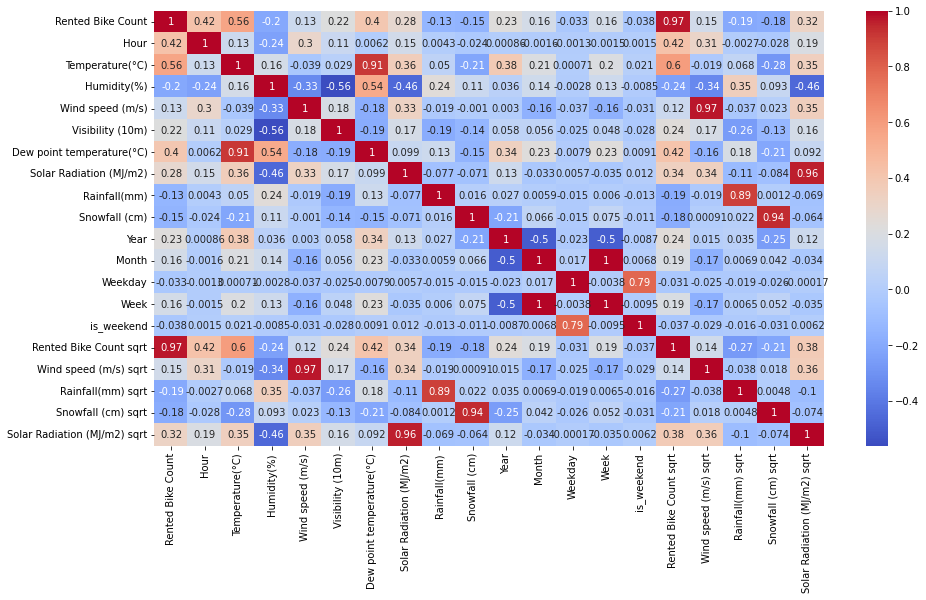

In [ ]:
plt.figure(figsize=(15,8))
correlation = seoul_xtrain_ts.corr()
sns.heatmap((correlation), annot=True, cmap='coolwarm')

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(seoul_xtrain_ts[[i for i in seoul_xtrain_ts.describe().columns if i not in ['Rented Bike Count','Rented Bike Count sqrt','Dew point temperature(°C)','Week','Year','Weekday','Wind speed (m/s)',
                                                                                     'Rainfall(mm)','Snowfall (cm)','Solar Radiation (MJ/m2)','Wind speed (m/s) sqrt','Humidity(%)']]])

,variables,VIF
0,Hour,3.470216
1,Temperature(°C),2.795498
2,Visibility (10m),4.556115
3,Month,4.001939
4,is_weekend,1.344799
5,Rainfall(mm) sqrt,1.086520
6,Snowfall (cm) sqrt,1.141083
7,Solar Radiation (MJ/m2) sqrt,2.063122


In [ ]:
num_features = ['Hour','Temperature(°C)','Visibility (10m)','Month','is_weekend','Rainfall(mm) sqrt','Snowfall (cm) sqrt','Solar Radiation (MJ/m2) sqrt']

In [ ]:
seoul_merged_train_enc = seoul_xtrain_ts.copy()

seoul_merged_train_enc = pd.get_dummies(seoul_merged_train_enc, columns=["Holiday","Seasons"], 
                            prefix=["Holiday","Seasons"])

seoul_merged_test_enc = seoul_xtest_ts.copy()
seoul_merged_test_enc = pd.get_dummies(seoul_xtest_ts, columns=["Holiday","Seasons"], 
                            prefix=["Holiday","Seasons"])

In [ ]:
seoul_merged_test_enc.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Functioning Day', 'Year', 'Month', 'Weekday', 'Week', 'is_weekend',
       'Rented Bike Count sqrt', 'Wind speed (m/s) sqrt', 'Rainfall(mm) sqrt',
       'Snowfall (cm) sqrt', 'Solar Radiation (MJ/m2) sqrt', 'Holiday_Holiday',
       'Holiday_No Holiday', 'Seasons_Autumn', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter'],
      dtype='object')

In [ ]:
features = num_features.copy()

features.extend(['Holiday_Holiday','Holiday_No Holiday','Seasons_Autumn', 'Seasons_Spring','Seasons_Summer', 'Seasons_Winter'])

In [ ]:
seoul_x_train = seoul_merged_train_enc[features].copy()
seoul_y_train = seoul_merged_train_enc['Rented Bike Count sqrt'].copy()

seoul_x_test = seoul_merged_test_enc[features].copy()
seoul_y_test = seoul_merged_test_enc['Rented Bike Count sqrt'].copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(seoul_x_train)

seoul_x_train = pd.DataFrame(scaler.transform(seoul_x_train),index = seoul_x_train.index,columns=seoul_x_train.columns)
seoul_x_test = pd.DataFrame(scaler.transform(seoul_x_test),index = seoul_x_test.index,columns=seoul_x_test.columns)

In [ ]:
import statsmodels.api as sm

seoul_x_train_cnst = sm.add_constant(seoul_x_train.copy())

model = sm.OLS(seoul_y_train, seoul_x_train_cnst).fit()
predictions_train = model.predict(seoul_x_train_cnst) 

print_model = model.summary()
print(print_model)

                              OLS Regression Results                              
Dep. Variable:     Rented Bike Count sqrt   R-squared:                       0.629
Model:                                OLS   Adj. R-squared:                  0.629
Method:                     Least Squares   F-statistic:                     836.7
Date:                    Sun, 08 May 2022   Prob (F-statistic):               0.00
Time:                            15:06:58   Log-Likelihood:                -20118.
No. Observations:                    5925   AIC:                         4.026e+04
Df Residuals:                        5912   BIC:                         4.035e+04
Df Model:                              12                                         
Covariance Type:                nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [195]:
seoul_bike_data2 = seoul_bike_data.copy()

In [196]:
# feature extraction:

seoul_bike_data2["Date_Hour"] = pd.to_datetime(pd.to_datetime(seoul_bike_data2.Date).dt.strftime('%d/%m/%Y')) #strftime converts date to string, so pd.to_datetime is applied again.

seoul_bike_data2['Date_Hour'] +=  pd.to_timedelta(seoul_bike_data2.Hour, unit='h') # adding hour detail to datetime as per hour given in 'hour' column, using pd.to_timedelta

seoul_bike_data2.set_index('Date_Hour',inplace = True) #setting datetime as index

#extracting various units of time
seoul_bike_data2['Year'] = seoul_bike_data2.index.year
seoul_bike_data2['Month'] = seoul_bike_data2.index.month
seoul_bike_data2['Weekday'] = seoul_bike_data2.index.weekday
seoul_bike_data2['Week'] = seoul_bike_data2.index.week

In [197]:
seoul_bike_data2.Holiday.unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [198]:
# replacinf holiday with no-holiday for 22/12/2017
seoul_bike_data2["Holiday"] = np.where(seoul_bike_data2["Date"] == "22/12/2017", "No Holiday", seoul_bike_data2["Holiday"])

In [199]:
def is_weekend_or_holiday1(x):
  if x in [5,6]:
    return 1
  else:
    return 0

In [200]:
seoul_bike_data2['is_weekend_or_holiday'] = seoul_bike_data2['Weekday'].apply(is_weekend_or_holiday1)
seoul_bike_data2['is_weekend_or_holiday'] = np.where(seoul_bike_data2['Holiday'] == 'Holiday', 1,seoul_bike_data2['is_weekend_or_holiday'])

In [201]:
seoul_bike_data2

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Weekday,Week,is_weekend_or_holiday
Date_Hour,,,,,,,,,,,,,,,,,,,
2017-12-01 00:00:00,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,48,0
2017-12-01 01:00:00,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,48,0
2017-12-01 02:00:00,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,48,0
2017-12-01 03:00:00,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,48,0
2017-12-01 04:00:00,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-30 19:00:00,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,4,48,0
2018-11-30 20:00:00,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,4,48,0
2018-11-30 21:00:00,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,4,48,0


In [206]:
rented_bike_count_hourly_mean_df = seoul_bike_data2.groupby(['is_weekend_or_holiday','Hour'])[['Rented Bike Count']].mean().rename(columns={'Rented Bike Count':'Rented Bike Count Mean'})
rented_bike_count_hourly_mean_df

Rented Bike Count
is_weekend_or_holiday Hour                   
0                     0            495.891129
                      1            380.681452
                      2            258.564516
                      3            171.040323
                      4            116.370968
                      5            148.205645
                      6            348.258065
                      7            773.939516
                      8           1301.161290
                      9            717.919355
                      10           522.286290
                      11           588.524194
                      12           669.943548
                      13           670.895161
                      14           684.951613
                      15           755.044355
                      16           873.939516
                      17          1148.572581
                      18          1697.798387
                      19          1279.004032
                      20          1111.181452
                      21          1075.165323
                      22           968.826613
                      23           687.528226
1                     0            638.051282
                      1            522.632479
                      2            392.914530
                      3            271.777778
                      4            166.974359
                      5            119.743590
                      6            158.914530
                      7            250.042735
                      8            410.623932
                      9            493.504274
                      10           539.555556
                      11           626.982906
                      12           761.965812
                      13           865.410256
                      14           915.410256
                      15           986.341880
                      16          1050.769231
                      17          1117.179487
                      18          1089.863248
                      19          1017.401709
                      20           979.478632
                      21           938.786325
                      22           825.230769
                      23           636.358974

In [204]:
seoul_bike_data2.groupby(['Month'])[['Rented Bike Count']].mean()

,Rented Bike Count
Month,
1,201.620968
2,225.941964
3,511.551075
4,728.093056
5,950.387097
6,1245.676389
7,987.177419
8,876.192204
9,935.572222
